### The 2 ML Algorithms:
    1: Convolution Neural Network
    2: SVM

___
Importing Libraries

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import  tensorflow  as  tf 
from  tensorflow.keras  import layers,  models
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm

Reading Data

In [150]:
batch1 = pd.read_pickle('data_batch_1')
batch2 = pd.read_pickle('data_batch_2')
batch3 = pd.read_pickle('data_batch_3')
batch4 = pd.read_pickle('data_batch_4')
batch5 = pd.read_pickle('data_batch_5')
test = pd.read_pickle('test_batch')

Printing the lenght of each data batch 

In [151]:
print(len(batch1['data']))
print(len(batch2['data']))
print(len(batch3['data']))
print(len(batch4['data']))
print(len(batch5['data']))
print(len(test['data']))

10000
10000
10000
10000
10000
10000


Initializing a label names array

In [152]:
label_names  =  [ 'airplane' ,  'automobile' ,  'bird' ,  'cat' ,  'deer' ,  'dog' ,  'frog' ,  'horse' ,  'ship' ,  'truck' ]

Initializing the data for both CNN and SVM

In [173]:
X_batch1 = batch1['data']
X_svm_batch1 = batch1['data']
X_batch2 = batch2['data']
X_svm_batch2 = batch2['data']
X_batch3 = batch3['data']
X_svm_batch3 = batch3['data']
X_batch4 = batch4['data']
X_svm_batch4 = batch4['data']
X_batch5 = batch5['data']
X_svm_batch5 = batch5['data']
X_test = test['data']
X_svm_test = test['data']

Y_batch1 = batch1['labels']
Y_svm_batch1 = batch1['labels']
Y_batch2 = batch2['labels']
Y_svm_batch2 = batch2['labels']
Y_batch3 = batch3['labels']
Y_svm_batch3 = batch3['labels']
Y_batch4 = batch4['labels']
Y_svm_batch4 = batch4['labels']
Y_batch5 = batch5['labels']
Y_svm_batch5 = batch5['labels']
Y_test = test['labels']
Y_svm_test = test['labels']

___
### Pre Processing

Checking the shape of data for each algorithm

In [154]:
print(X_batch1.shape)
print(X_svm_batch1.shape)
print(X_test.shape)

(10000, 3072)
(10000, 3072)
(10000, 3072)


Reshaping the data for CNN

In [155]:
X_batch1 = X_batch1.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X_batch2 = X_batch2.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X_batch3 = X_batch3.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X_batch4 = X_batch4.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X_batch5 = X_batch5.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X_test = X_test.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

Now checking the shape of data for each Algorithm

In [156]:
print(X_batch1.shape)
print(X_svm_batch1.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 3072)
(10000, 32, 32, 3)


Converting the labels into np array

In [157]:
Y_batch1 = np.array(Y_batch1)
Y_batch2 = np.array(Y_batch2)
Y_batch3 = np.array(Y_batch3)
Y_batch4 = np.array(Y_batch4)
Y_batch5 = np.array(Y_batch5)
Y_test = np.array(Y_test)

Displaying Images

In [158]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(label_names[y[index]])

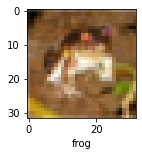

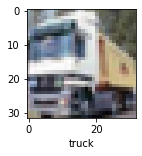

In [159]:
plot_sample(X_batch1, Y_batch1, 0)
plot_sample(X_batch1, Y_batch1, 1)

Normalizing Data for CNN

In [160]:
X_batch1 = X_batch1 / 255.0
X_batch2 = X_batch2 / 255.0
X_batch3 = X_batch3 / 255.0
X_batch4 = X_batch4 / 255.0
X_batch5 = X_batch5 / 255.0
X_test = X_test / 255.0

In [161]:
print(X_batch1)
print(X_batch2)
print(X_batch3)
print(X_batch4)
print(X_batch5)
print(X_test)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

____
### Convolution Neural Network

With 2 layers  
=> 1st layer with 32 filters  
=> 2nd layer with 64 filters

In [162]:
cnn  =  models . Sequential ([ 
    # Layer1
    layers.Conv2D( filters = 32 ,  kernel_size = ( 3 ,  3 ),  activation = 'relu' ,  input_shape = ( 32 ,  32 ,  3 )), 
    layers.MaxPooling2D (( 2 ,  2 )), 
    # layer 2
    layers.Conv2D ( filters = 64 ,  kernel_size = ( 3 ,  3 ),  activation = 'relu' ), 
    layers.MaxPooling2D (( 2 ,  2 )), 
    # activation function
    layers.Flatten (), 
    layers.Dense ( 64 ,  activation = 'relu' ), 
    layers.Dense ( 10 ,  activation = 'softmax' ) 
]) 

Compiling the CNN

In [163]:
cnn.compile ( optimizer = 'adam' , 
              loss = 'sparse_categorical_crossentropy' , 
              metrics = [ 'accuracy' ]) 

Fitting the CNN for training batches for 5 epochs

In [164]:
print("BATCH 1__________________________________________________________________________________________________")
cnn . fit ( X_batch1 ,  Y_batch1 ,  epochs = 5 ) 
print("BATCH 2__________________________________________________________________________________________________")
cnn . fit ( X_batch2 ,  Y_batch2 ,  epochs = 5 )
print("BATCH 3__________________________________________________________________________________________________")
cnn . fit ( X_batch3 ,  Y_batch3 ,  epochs = 5 )
print("BATCH 4__________________________________________________________________________________________________")
cnn . fit ( X_batch4 ,  Y_batch4 ,  epochs = 5 )
print("BATCH 5__________________________________________________________________________________________________")
cnn . fit ( X_batch5 ,  Y_batch5 ,  epochs = 5 )

BATCH 1__________________________________________________________________________________________________
Epoch 1/5
313/313 [==============================] - 8s 25ms/step - loss: 1.7896 - accuracy: 0.3493
Epoch 2/5
313/313 [==============================] - 8s 24ms/step - loss: 1.4127 - accuracy: 0.4924
Epoch 3/5
313/313 [==============================] - 8s 25ms/step - loss: 1.2730 - accuracy: 0.5495
Epoch 4/5
313/313 [==============================] - 8s 25ms/step - loss: 1.1545 - accuracy: 0.5928
Epoch 5/5
313/313 [==============================] - 8s 25ms/step - loss: 1.0646 - accuracy: 0.6300
BATCH 2__________________________________________________________________________________________________
Epoch 1/5
313/313 [==============================] - 8s 25ms/step - loss: 1.1995 - accuracy: 0.5836
Epoch 2/5
313/313 [==============================] - 8s 24ms/step - loss: 1.0789 - accuracy: 0.6238
Epoch 3/5
313/313 [==============================] - 8s 24ms/step - loss: 0.9952 - accur

Evaluating the CNN on the test data 

In [165]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0634 - accuracy: 0.6488


[1.0634173154830933, 0.6488000154495239]

Predicting the CNN on the test data and printing the first 5 predictions

In [166]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[3.08895744e-02, 1.40967984e-02, 5.60236163e-02, 6.49728537e-01,
        7.68268993e-03, 1.26691103e-01, 9.70088020e-02, 3.54646181e-04,
        1.74616538e-02, 6.25517423e-05],
       [7.38572737e-04, 2.10452657e-02, 2.84274793e-05, 8.86146438e-07,
        5.74727714e-08, 1.83986965e-10, 5.46722045e-09, 2.78040757e-10,
        9.78159308e-01, 2.74980721e-05],
       [6.38271943e-02, 4.97422218e-01, 3.04306834e-03, 4.26869723e-04,
        5.12582017e-03, 6.00636849e-06, 4.33036941e-04, 2.20467933e-04,
        4.22107220e-01, 7.38815358e-03],
       [7.83568621e-01, 5.12542129e-02, 6.21022377e-03, 5.64715185e-04,
        1.41777995e-03, 4.47770788e-07, 1.22356660e-05, 2.77410381e-05,
        1.56829774e-01, 1.14360169e-04],
       [8.84127585e-05, 2.39509507e-04, 1.36962151e-02, 1.07116506e-01,
        6.87613070e-01, 3.16365473e-02, 1.58760443e-01, 3.25744855e-04,
        5.20658155e-04, 2.87104967e-06]], dtype=float32)

Now getting the max elements to get the predicted labels of the first 5 pictures and comparing them with the actual first 5 labels 

In [167]:
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes[:5])
print(Y_test[:5])

[3, 8, 1, 0, 4]
[3 8 8 0 6]


Displaying 1 wrong and 1 correct Prediction

Predicted: ship


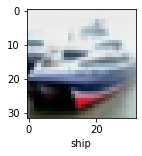

In [168]:
# Wrong Prediction at index 1
plot_sample(X_test, Y_test,1)
print("Predicted: " + label_names[y_classes[1]])

Predicted: deer


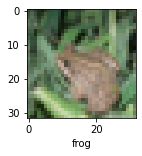

In [169]:
# Correct Prediction at index 4
plot_sample(X_test, Y_test,4)
print("Predicted: " + label_names[y_classes[4]])

Printing the classification report of CNN

In [170]:
print("Classification Report: \n", classification_report(Y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.78      0.69      1000
           1       0.70      0.85      0.77      1000
           2       0.44      0.65      0.53      1000
           3       0.53      0.45      0.48      1000
           4       0.65      0.49      0.56      1000
           5       0.62      0.49      0.55      1000
           6       0.71      0.75      0.73      1000
           7       0.73      0.71      0.72      1000
           8       0.78      0.72      0.75      1000
           9       0.83      0.60      0.70      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



___
### SVM Algorithm 

Training the SVM algorithm on trainging batches

In [171]:
svc = svm.SVC(probability=False,  kernel="linear", C=0.1)
svc.fit(X_svm_batch1, Y_svm_batch1)
svc.fit(X_svm_batch2, Y_svm_batch2)
svc.fit(X_svm_batch3, Y_svm_batch3)
svc.fit(X_svm_batch4, Y_svm_batch4)
svc.fit(X_svm_batch5, Y_svm_batch5)

SVC(C=0.1, kernel='linear')

Predicting SVM on test data

In [175]:
svc_linear_test = svc.predict(X_svm_test)

Getting the Accuracy of the model

In [176]:
acc_test = np.mean(svc_linear_test == Y_test)
print('Test Accuracy = {0:f}'.format(acc_test)) 

Test Accuracy = 0.308500


Classification Report of SVM

In [177]:
print("Classification Report: \n", classification_report(Y_test, Yhat_svc_linear_test))

Classification Report: 
               precision    recall  f1-score   support

           0       0.31      0.38      0.34      1000
           1       0.37      0.36      0.36      1000
           2       0.21      0.27      0.24      1000
           3       0.21      0.24      0.22      1000
           4       0.25      0.27      0.26      1000
           5       0.23      0.21      0.22      1000
           6       0.35      0.27      0.30      1000
           7       0.38      0.32      0.34      1000
           8       0.42      0.44      0.43      1000
           9       0.39      0.28      0.33      1000

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.30     10000
weighted avg       0.31      0.30      0.30     10000

